In [1]:
# K-Means Clustering on Mall_Customers Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Step 1: Load and Visualize Dataset
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Select numerical features for clustering
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Step 2: Elbow Method to Find Optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

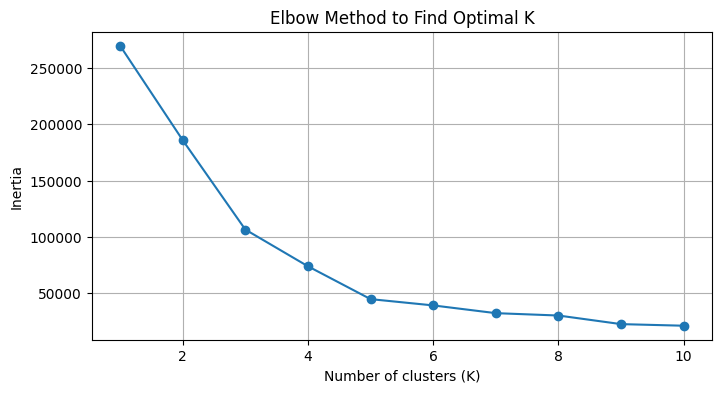

In [5]:
# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [6]:
# Step 3: Fit KMeans with Optimal K
optimal_k = 5  # Choose based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(data)

In [7]:
# Add cluster labels to the dataset
df['Cluster'] = clusters

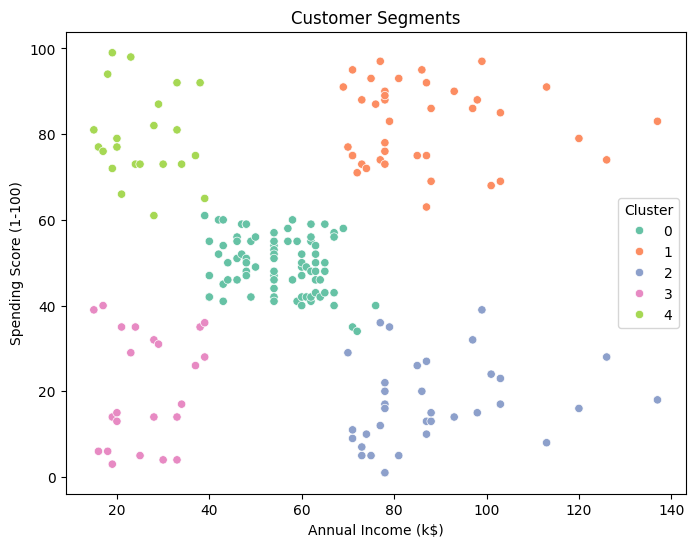

In [8]:
# Step 4: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.show()


In [9]:
# Step 5: Evaluate Clustering using Silhouette Score
score = silhouette_score(data, clusters)
print(f'Silhouette Score for k={optimal_k}: {score:.2f}')

Silhouette Score for k=5: 0.55
